In [11]:
from datetime import date

import yahoo_fin.stock_info as si
from yahoo_fin import options

In [12]:
Mat = date(2023, 3, 17)  # Fill in the maturity you want to consider here!
T = Mat - date.today()
ticker = "IBM"

chain = options.get_options_chain(ticker,Mat)
options_mats = options.get_expiration_dates(ticker)

price = si.get_live_price(ticker)
print(price)

callData = chain["calls"]
putData = chain["puts"]
print(len(callData))
callData

134.8699951171875
27


,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,IBM230317C00060000,2023-02-08 3:09PM EST,60.0,76.13,74.45,74.80,0.00,-,10,0,0.00%
1,IBM230317C00065000,2023-02-08 3:48PM EST,65.0,71.15,68.85,70.10,0.00,-,9,0,112.31%
2,IBM230317C00080000,2023-02-08 2:56PM EST,80.0,56.15,53.25,55.05,0.00,-,8,0,80.18%
3,IBM230317C00085000,2023-02-08 3:07PM EST,85.0,51.20,48.90,50.05,0.00,-,25,0,71.88%
4,IBM230317C00090000,2023-01-19 3:50PM EST,90.0,51.30,43.90,45.05,0.00,-,1,0,63.97%
5,IBM230317C00095000,2023-02-08 3:44PM EST,95.0,41.20,39.20,40.15,0.00,-,7,1,60.74%
6,IBM230317C00100000,2023-02-09 10:32AM EST,100.0,35.54,34.60,35.10,0.00,-,2,13,51.27%
7,IBM230317C00105000,2023-02-09 9:37AM EST,105.0,30.38,29.15,30.10,0.00,-,3,3,44.09%
8,IBM230317C00110000,2023-02-08 3:05PM EST,110.0,26.00,24.55,25.15,0.00,-,70,0,38.53%
9,IBM230317C00115000,2023-02-08 3:07PM EST,115.0,21.10,18.70,20.50,0.00,-,75,0,38.06%


**Plotting Implied Volatility of Call Strike**

<ipython-input-13-22ef0e66b5ba>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_call["Strike"] = df_call["Strike"].astype(float)


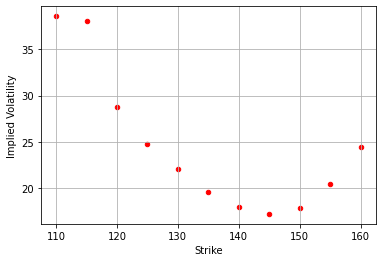

In [13]:
import matplotlib.pyplot as plt

df_call = callData
df_call["Implied Volatility"] = df_call["Implied Volatility"].str[:-1]
df_call["Implied Volatility"] = df_call["Implied Volatility"].astype(float)
df_call = df_call[df_call["Implied Volatility"] > 0]
df_call["Strike"] = df_call["Strike"].astype(float)
df_call = df_call[
    df_call["Strike"] > price * 0.8
]  # We will only consider those options within a certain range of the current price
df_call = df_call[
    df_call["Strike"] < price * 1.2
]  # One reason for this is that it is precisely those options that are most often traded.


df_call.plot(kind="scatter", x="Strike", y="Implied Volatility", color="red")
plt.grid()
plt.show()


**Plotting Implied Volatility of Put Strike**

<ipython-input-16-eaf15e4cef0e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_put["Strike"] = df_put["Strike"].astype(float)


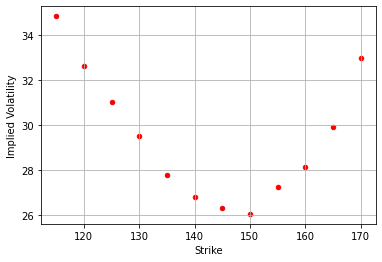

In [16]:
df_put = putData

df_put["Implied Volatility"] = df_put["Implied Volatility"].str[:-1]
df_put["Implied Volatility"] = df_put["Implied Volatility"].astype(float)
df_put = df_put[df_put["Implied Volatility"] > 0]
df_put["Strike"] = df_put["Strike"].astype(float)
df_put = df_put[df_put["Strike"] > price * 0.8]
df_put = df_put[df_put["Strike"] < price * 1.2]

df_put.plot(kind="scatter", x="Strike", y="Implied Volatility", color="red")
plt.grid()
plt.show()

# **Calcualting Implied Volatility from Newton Raphson Method**

In [17]:
import numpy as np
from scipy.stats import norm

In [18]:
N_prime = norm.cdf
N = norm.cdf

Newton-Raphson method we will be iterating and updating our volatility parameter, $\sigma$, according to:

$\sigma_{i+1} = \sigma_i - \frac{f(\sigma_i)}{f'(\sigma_i)}, \ ∀ i \geq 0 $


We'll start by defining the objective function of the optimization, $f(\sigma_i)$, the Black-Scholes pricing equation:

In [19]:
def black_scholes_call(S,K,T,r,sigma):
    """
    :param S: Asset price
    :param K: Strike price
    :param T: Time to maturity
    :param r: risk-free rate (treasury bills)
    :param sigma: volatility
    :return: call price
    """

    # Black-Scholes Formula
    d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    call = S * N(d1) - N(d2) * K * np.exp(-r * T)
    return call
    

Next, we'll define $f'(\sigma_i)$, which is basically the `vega` of the option:

In [20]:
def vega(S, K, T, r, sigma):
    """

    :param S: Asset price
    :param K: Strike price
    :param T: Time to Maturity
    :param r: risk-free rate (treasury bills)
    :param sigma: volatility
    :return: partial derivative w.r.t volatility
    """

    # Calculating d1 from black scholes
    d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / sigma * np.sqrt(T)
    vega = S * np.sqrt(T) * N_prime(d1)
    return vega

In [25]:
def newton_raphson_implied_volatility_call(C, S, K, T, r, tol=0.0001, max_iterations=100):
    """

    :param C: Observed call price
    :param S: Asset price
    :param K: Strike Price
    :param T: Time to Maturity
    :param r: risk free rate
    :param tol: error tolerance in result
    :param max_iterations: max iterations to update vol
    :return: implied volatility in percent
    """

    # assigning initial volatility estimate for input in Newton_rap procedure
    sigma = 0.45

    for i in range(max_iterations):

        # calculate difference between black-scholes price and market price with
        # iteratively updated volatility estimate
        diff = black_scholes_call(S, K, T, r, sigma) - C

        # break if difference is less than specified tolerance level
        if abs(diff) < tol:
            print(f"found on {i}th iteration")
            print(f"difference is equal to {diff}")
            break

        # use Newton-Rapshon to update the estimate
        sigma = sigma - diff / vega(S, K, T, r, sigma)

    return sigma

In [27]:
observed_price = 20
S = 100
K = 115
T = 1
r = 0.05

imp_vol = newton_raphson_implied_volatility_call(observed_price, S, K, T, r)
print("Implied volatility using Newton Rapshon is: ", imp_vol)

found on 9th iteration
difference is equal to -6.259110889317299e-05
Implied volatility using Newton Rapshon is:  0.5933759929777402
